# Price Optimisation based on the price elasticity of demand 

In [1]:
## Install packages
!pip install pandas
!pip install numpy
!pip install statsmodels
!pip install  matplotlib
!pip install seaborn

     |████████████████████████████████| 17.7 MB 6.4 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.2
    Uninstalling numpy-1.23.2:
      Successfully uninstalled numpy-1.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


In [2]:
## Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)


/Users/keith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/keith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:8: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/keith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:8: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Loading Data

In [5]:
date_info = pd.read_csv("Cafe_Dateinfo.csv")
sold = pd.read_csv("Cafe_Sell_Meta_Data.csv")
transaction = pd.read_csv("Cafe_Transaction_Store.csv")

## Sold data overview

In [6]:
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [7]:
sold.describe()

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


In [8]:
sold.describe(include = ['O'])

,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [9]:
## Checking for null values
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


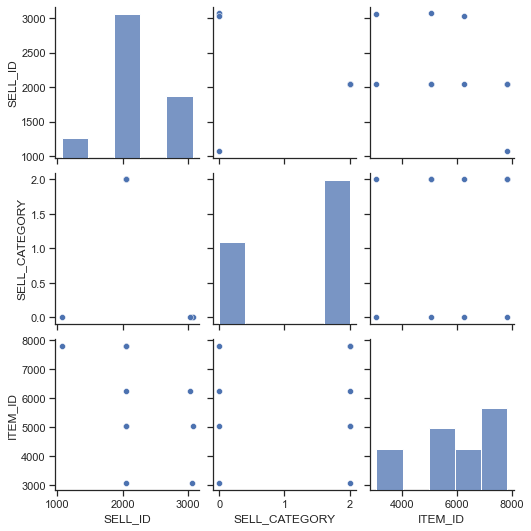

In [10]:
sns.pairplot(sold)

## Transaction Data Overview

In [11]:
transaction.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [12]:
transaction.describe()


,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


In [13]:
transaction.describe(include = ["O"])

,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [14]:
## Checking for null values
transaction[transaction.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

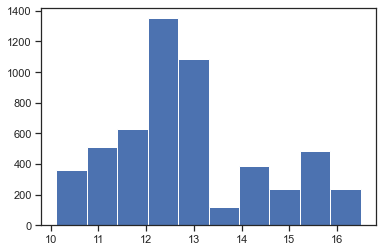

In [15]:
plt.hist(transaction.PRICE)

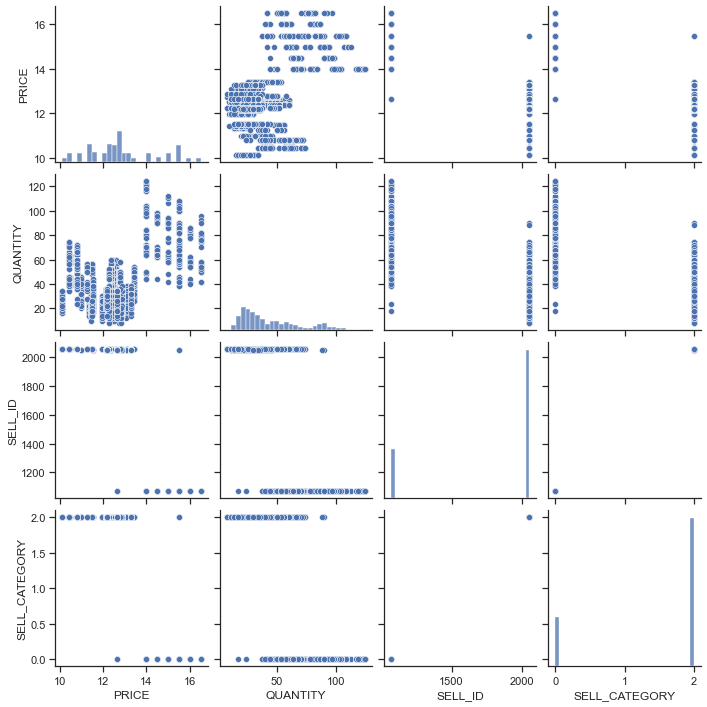

In [16]:
sns.pairplot(transaction)

We see two groups of the relation of quantity and price.
1.Low quantity and low price 
2.High quantity and high price

## Date Info Overview

In [17]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [18]:
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [19]:
date_info.describe()

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


In [20]:
date_info.describe(include ="O")

,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [21]:
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0
8,1/9/12,2012,NaN,0,0,23.0,0
9,1/10/12,2012,NaN,0,0,24.8,0
10,1/11/12,2012,NaN,0,0,21.2,0
11,1/12/12,2012,NaN,0,0,24.8,0
12,1/13/12,2012,NaN,0,0,26.6,0


In [22]:
## Replace NaN values to "No Holiday"
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna('No Holiday')

In [23]:
## Checking for other nulls
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [24]:
date_info

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0
5,1/6/12,2012,No Holiday,0,0,23.0,0
6,1/7/12,2012,No Holiday,1,0,26.6,0
7,1/8/12,2012,No Holiday,1,0,26.6,0
8,1/9/12,2012,No Holiday,0,0,23.0,0
9,1/10/12,2012,No Holiday,0,0,24.8,0


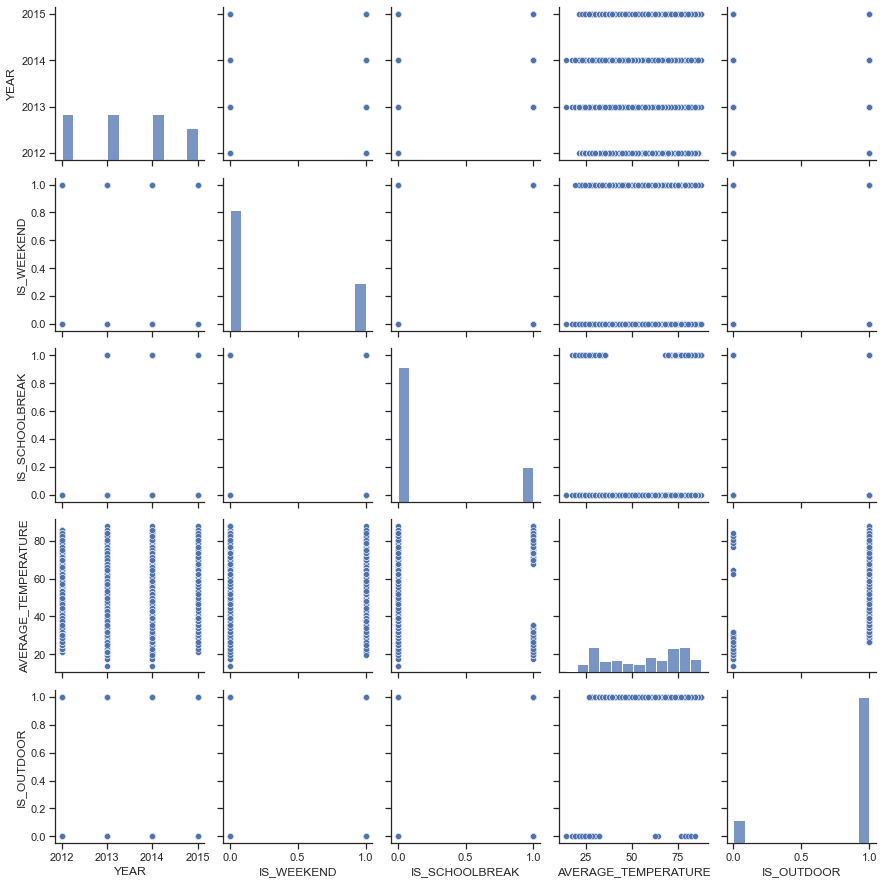

In [25]:
sns.pairplot(date_info)

In [26]:
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [27]:
date_info.max()

CALENDAR_DATE                    9/9/15
YEAR                               2015
HOLIDAY                WWII Celebration
IS_WEEKEND                            1
IS_SCHOOLBREAK                        1
AVERAGE_TEMPERATURE                87.8
IS_OUTDOOR                            1
dtype: object

In [28]:
date_info.min()

CALENDAR_DATE                        1/1/12
YEAR                                   2012
HOLIDAY                Dragon Boat Festivel
IS_WEEKEND                                0
IS_SCHOOLBREAK                            0
AVERAGE_TEMPERATURE                    14.0
IS_OUTDOOR                                0
dtype: object

In [29]:
date_info.shape

(1349, 7)

## Concatenate the item sold with each sell_id

In [30]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)


,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [31]:
## Get sum of item sold of each unique SELL_ID
sold_by_item = pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()
sold_by_item

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


## Merging tables

In [32]:
## Merge sold & transaction on SELL_ID
a = pd.merge(sold.drop(['ITEM_ID'], axis=1), transaction.drop(['SELL_CATEGORY'], axis=1), on='SELL_ID')
a.head(20)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104
5,1070,0,BURGER,01/06/12,15.5,100
6,1070,0,BURGER,01/07/12,15.5,70
7,1070,0,BURGER,01/08/12,15.5,70
8,1070,0,BURGER,01/09/12,15.5,106
9,1070,0,BURGER,01/10/12,15.5,108


In [33]:
data1 = a.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME','CALENDAR_DATE', 'PRICE']).QUANTITY.sum()
data1

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.50     46
                                   01/01/13       15.50     60
                                   01/01/14       15.50     72
                                   01/01/15       14.00     66
                                   01/02/12       15.50     70
                                   01/02/13       15.50     68
                                   01/02/14       15.50     76
                                   01/02/15       14.00    102
                                   01/03/12       15.50     62
                                   01/03/13       15.50     70
                                   01/03/14       15.50     68
                                   01/03/15       14.00     68
                                   01/04/12       15.50     88
                                   01/04/13       15.50    100
                                   01/04/14       15.50     74

In [34]:
data2 = data1.reset_index()

In [35]:
## Merge data1 with date_info
combined_data = pd.merge(data2, date_info, on = 'CALENDAR_DATE')
combined_data.head(30)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
5,2053,2,BURGER,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
6,2053,2,COFFEE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
7,2053,2,COKE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.50,70,2013,No Holiday,1,0,30.2,0
9,2051,2,BURGER,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0


In [36]:
combined_data.shape

(6696, 12)

In [37]:
combined_data[combined_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


# Data Exploration

We can first create the data without the effect of holidays, school breaks and weekend. \
For a better look of the difference between a normal day and a special day.

In [38]:
weekdays = combined_data[(combined_data['HOLIDAY'] == 'No Holiday') \
                         & (combined_data['IS_WEEKEND'] == 0) \
                         & (combined_data['IS_SCHOOLBREAK'] == 0)]

In [39]:
weekdays.shape

(3768, 12)

In [40]:
weekdays.head(20)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
5,2053,2,BURGER,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
6,2053,2,COFFEE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
7,2053,2,COKE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
16,1070,0,BURGER,1/13/14,15.50,104,2014,No Holiday,0,0,28.4,0
17,2051,2,BURGER,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0


(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

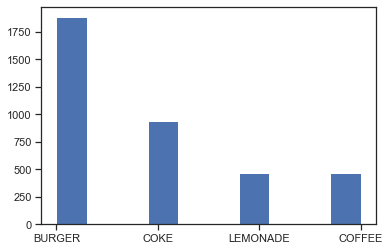

In [41]:
plt.hist(weekdays.ITEM_NAME)

Burger has the highest quantity sold. \
Lemonade has the lowest.

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

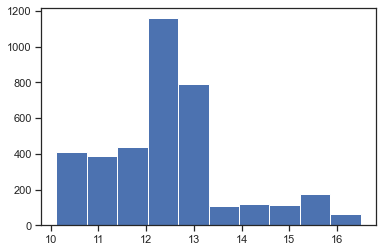

In [42]:
plt.hist(weekdays.PRICE)

Most item sold have the price of between \\$12-\\$13.

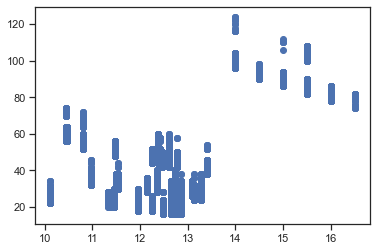

In [43]:
plt.scatter(weekdays['PRICE'], weekdays['QUANTITY'])

As mentioned above, items sold is splitted into 2 groups. 


#### Lets compare it with the combined_data 

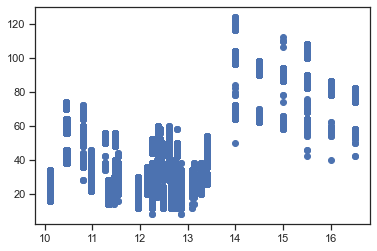

In [44]:
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])

Purchases on special days in the \\14-\\$16 mark mostly have the quantity sold of 40-80.

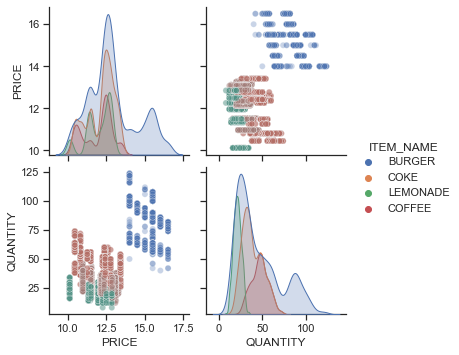

In [45]:
## Segregate based on items 
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.3})

We see clear distinction between the items. \
Burger seems to have highest price, and also with the higest demand. (Most sold)

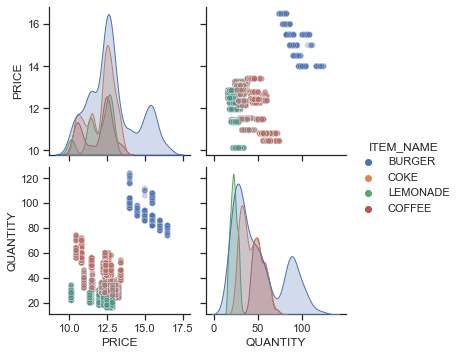

In [46]:
## Without Special days
sns.pairplot(weekdays[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.3})

We see a bimodal plot. And also as expected, the higher the price, the lower the quantity sold.

### A deeper look at the burger price

In [47]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger.describe()

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,1806.500000,1.500000,12.858572,44.974313,2013.351254,0.284349,0.200717,56.255914,0.878136
std,425.282579,0.866155,1.565046,25.747886,1.062567,0.451171,0.400596,19.996348,0.327177
min,1070.000000,0.000000,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,24.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.250000,2.000000,13.557500,60.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


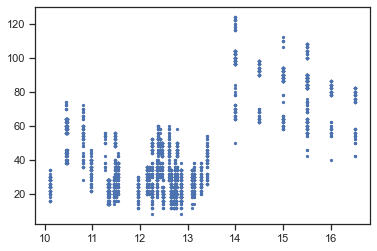

In [48]:
plt.scatter(burger['PRICE'], burger['QUANTITY'], s = 5)

From the scatter plot, there must be a different types of burger sold.

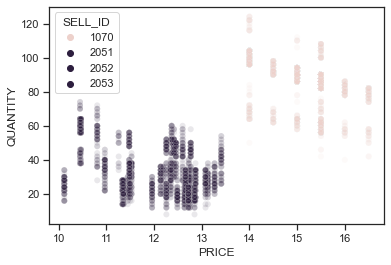

In [49]:
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', alpha = 0.1)

As we expected, there is two main types of burger, differ in prices.

#### Look more into burger with SELL_ID == 1070 

In [50]:
burger_1070 = burger[burger['SELL_ID'] == 1070]
burger_1070.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
16,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
24,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
32,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


In [51]:
burger_1070.describe()

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1070.0,0.0,15.154719,82.685783,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.744770,15.981238,1.063043,0.451373,0.400776,20.005316,0.327324
min,1070.0,0.0,14.000000,40.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1070.0,0.0,14.500000,68.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,1070.0,0.0,15.500000,86.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,1070.0,0.0,15.500000,92.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


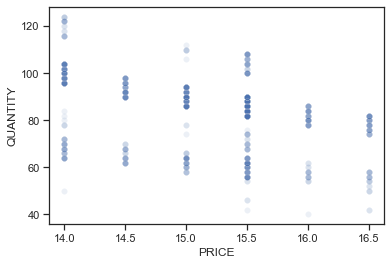

In [52]:
sns.scatterplot(data = burger_1070, x=burger_1070.PRICE, y=burger_1070.QUANTITY, alpha=0.1)

# Modelling

In [53]:
## Fitting ols regression model on burger_1070
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           1.45e-32
Time:                        17:51:08   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

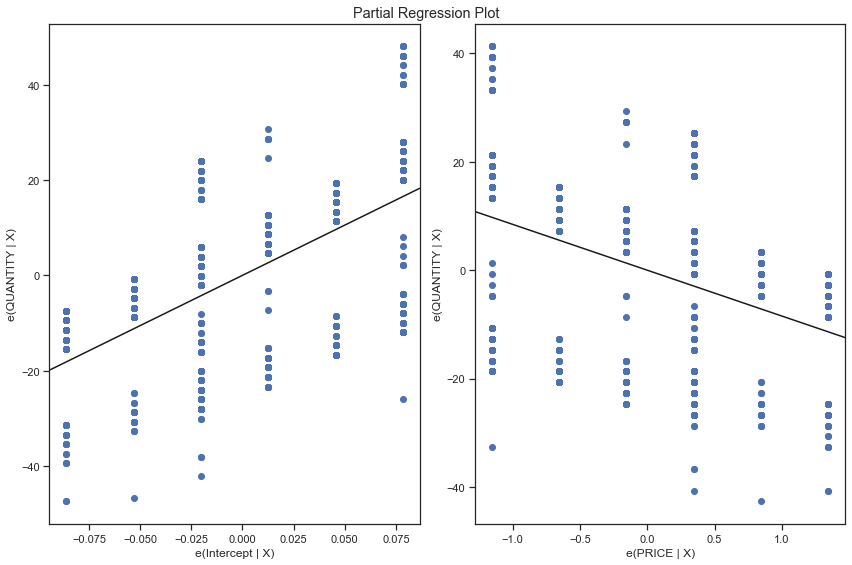

In [54]:
fig1 = plt.figure(figsize = (12,8))
fig1 = sm.graphics.plot_partregress_grid(burger_model, fig=fig1)

Adj. R-squared value = 0.155, the model does not explain the data well. \
This might be due to the large variation of quantity. \
\
The Price elasticity of the burger is -8.446.


,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
16,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
24,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
48,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
56,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


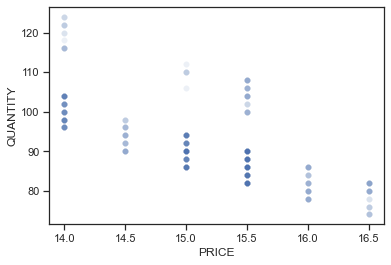

In [55]:
## Burgers 1070 sold on normal days
burger_weekdays_1070 = weekdays[(weekdays['ITEM_NAME'] == 'BURGER') & (weekdays['SELL_ID'] == 1070)]
burger_weekdays_1070.head()
sns.scatterplot(data=burger_weekdays_1070, x=burger_weekdays_1070.PRICE, y=burger_weekdays_1070.QUANTITY, alpha=0.1)

Plot looks cleaner now.

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           7.16e-70
Time:                        17:51:08   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

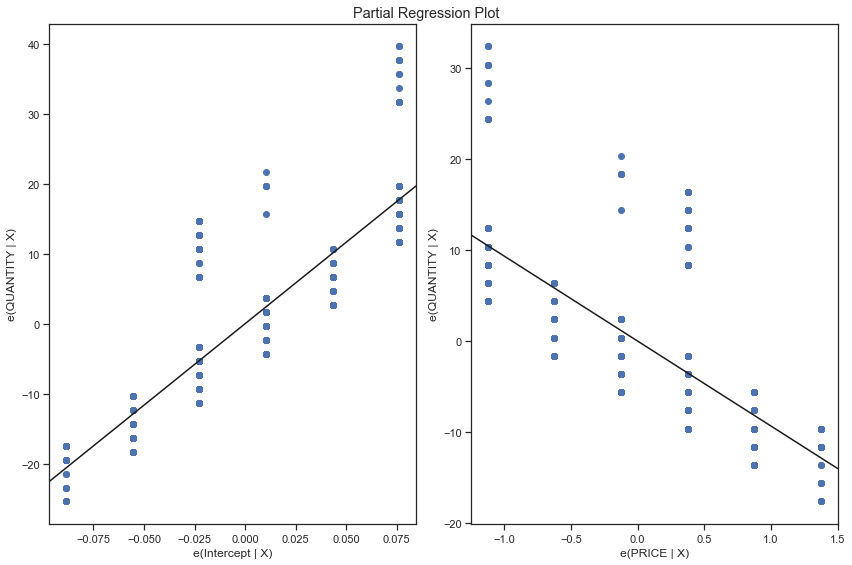

In [56]:
## Modelling 
burger_model1 = ols("QUANTITY ~ PRICE", data=burger_weekdays_1070).fit()
print(burger_model1.summary())
fig1 = plt.figure(figsize=(12,8))
fig1 = sm.graphics.plot_partregress_grid(burger_model1, fig=fig1)

Model has a better fit this time with a R-squared value of 0.486.

Looking at the weekday data again to find something to further refine the model.


In [57]:
weekdays.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [58]:
## IS_OUTDOOR might be useful here
burger_weekdays_outdoor_1070 = burger_weekdays_1070[burger_weekdays_1070['IS_OUTDOOR'] == 1]
burger_weekdays_outdoor_1070.head()
burger_weekdays_outdoor_1070.shape
burger_weekdays_outdoor_1070.describe()



,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
48,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
88,1070,0,BURGER,1/15/15,14.0,104,2015,No Holiday,0,0,32.0,1
120,1070,0,BURGER,1/16/15,14.0,100,2015,No Holiday,0,0,32.0,1
448,1070,0,BURGER,1/27/12,15.5,86,2012,No Holiday,0,0,32.0,1
576,1070,0,BURGER,1/31/12,15.5,84,2012,No Holiday,0,0,32.0,1


(416, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,416.0,416.0,416.000000,416.000000,416.000000,416.0,416.0,416.000000,416.0
mean,1070.0,0.0,15.139423,89.274038,2013.201923,0.0,0.0,57.282212,1.0
std,0.0,0.0,0.709511,6.811889,1.076628,0.0,0.0,16.890613,0.0
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,26.600000,1.0
25%,1070.0,0.0,14.500000,84.000000,2012.000000,0.0,0.0,41.000000,1.0
50%,1070.0,0.0,15.000000,88.000000,2013.000000,0.0,0.0,59.000000,1.0
75%,1070.0,0.0,15.500000,94.000000,2014.000000,0.0,0.0,71.600000,1.0
max,1070.0,0.0,16.500000,104.000000,2015.000000,0.0,0.0,87.800000,1.0


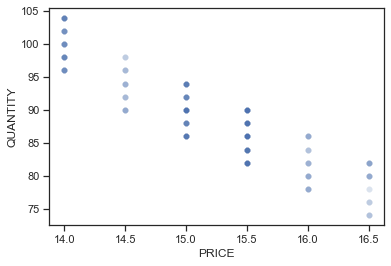

In [59]:
sns.scatterplot(data = burger_weekdays_outdoor_1070, \
                x = burger_weekdays_outdoor_1070.PRICE, \
                y = burger_weekdays_outdoor_1070.QUANTITY, alpha = 0.1)

This time we have a really clean scatter plot.

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Thu, 18 Aug 2022   Prob (F-statistic):          5.51e-153
Time:                        17:51:08   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 864x576 with 0 Axes>

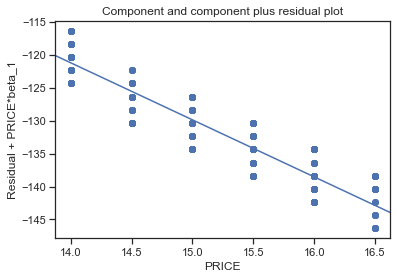

In [60]:
burger_model2 = ols("QUANTITY ~ PRICE", data = burger_weekdays_outdoor_1070).fit()
print(burger_model2.summary())
fig2 = plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_ccpr(burger_model2, "PRICE")

We see a clear negative trend, with small variation. \
R-squared = 0.813, which is a pretty good fit. \
\
Price elasticity = -8.6586.


## Plotting

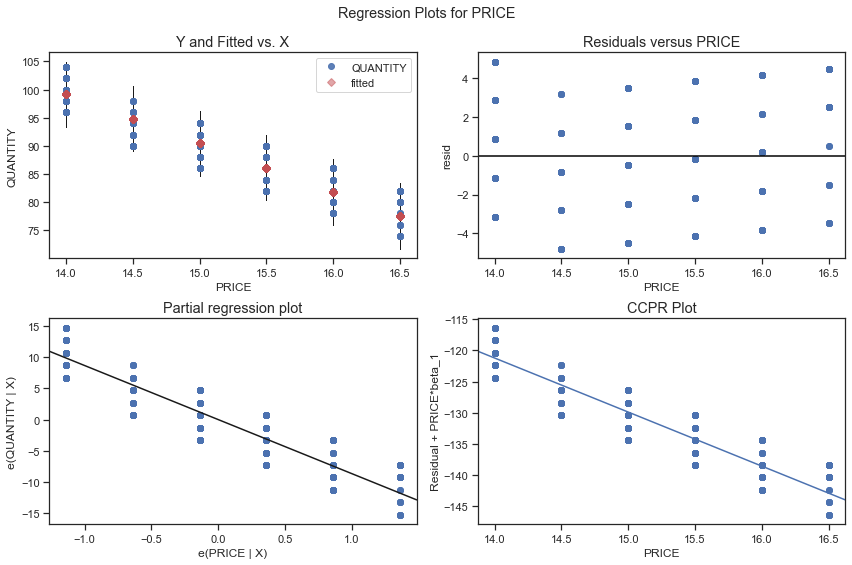

In [61]:
fig4 = plt.figure(figsize=(12,8))
fig4 = sm.graphics.plot_regress_exog(burger_model2, "PRICE", fig=fig4)

### Cross Checking

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
9,2051,2,BURGER,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
17,2051,2,BURGER,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0
25,2051,2,BURGER,1/13/15,11.53,38,2015,No Holiday,0,0,28.4,0
33,2051,2,BURGER,1/14/12,12.73,24,2012,No Holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2051.0,2.0,12.368017,29.498208,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.726329,5.782878,1.063043,0.451373,0.400776,20.005316,0.327324
min,2051.0,2.0,10.970000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.0,2.0,11.530000,26.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.0,2.0,12.660000,30.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2051.0,2.0,13.080000,34.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2051.0,2.0,13.270000,46.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


(837, 12)

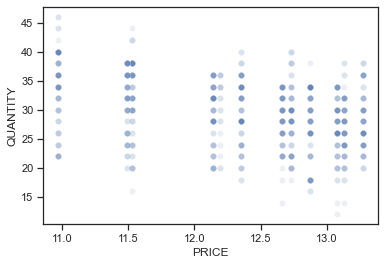

In [62]:
burger_2051 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') \
                            & (combined_data['SELL_ID'] == 2051)]
burger_2051.head()
burger_2051.describe()
burger_2051.shape
sns.scatterplot(data=burger_2051, x=burger_2051.PRICE, y=burger_2051.QUANTITY, alpha=0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           4.45e-27
Time:                        17:51:09   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

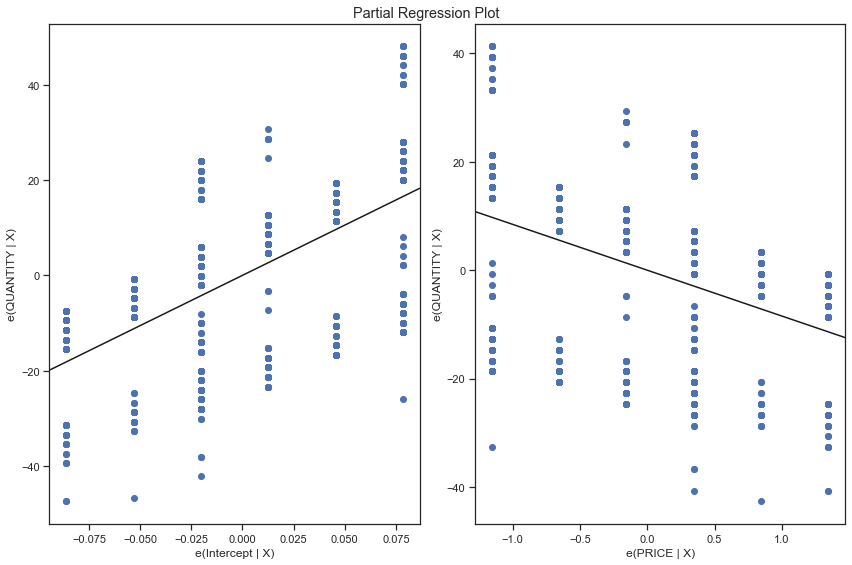

In [63]:
burger_model3 = ols('QUANTITY ~ PRICE', data= burger_2051).fit()
print(burger_model3.summary())
fig4 = plt.figure(figsize=(12,8))
fig4 = sm.graphics.plot_partregress_grid(burger_model, fig=fig4)


## Looking at other items

### Coke

In [64]:
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']
coke.head()
coke.describe()
coke.shape

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
7,2053,2,COKE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
10,2051,2,COKE,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
15,2053,2,COKE,1/13/13,13.41,32,2013,No Holiday,1,0,30.2,0
18,2051,2,COKE,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1674.000000,1674.0,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,2052.000000,2.0,12.151326,38.150538,2013.351254,0.284349,0.200717,56.255914,0.878136
std,1.000299,0.0,0.871405,11.861375,1.062726,0.451239,0.400656,19.999336,0.327226
min,2051.000000,2.0,10.450000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.000000,2.0,11.490000,30.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.000000,2.0,12.370000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.000000,2.0,12.770000,48.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


(1674, 12)

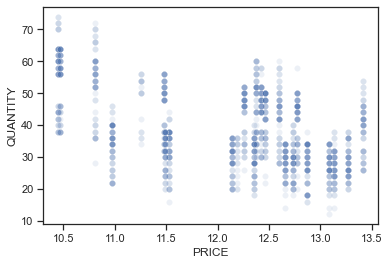

In [65]:
sns.scatterplot(data= coke, x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Thu, 18 Aug 2022   Prob (F-statistic):          1.94e-104
Time:                        17:51:09   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

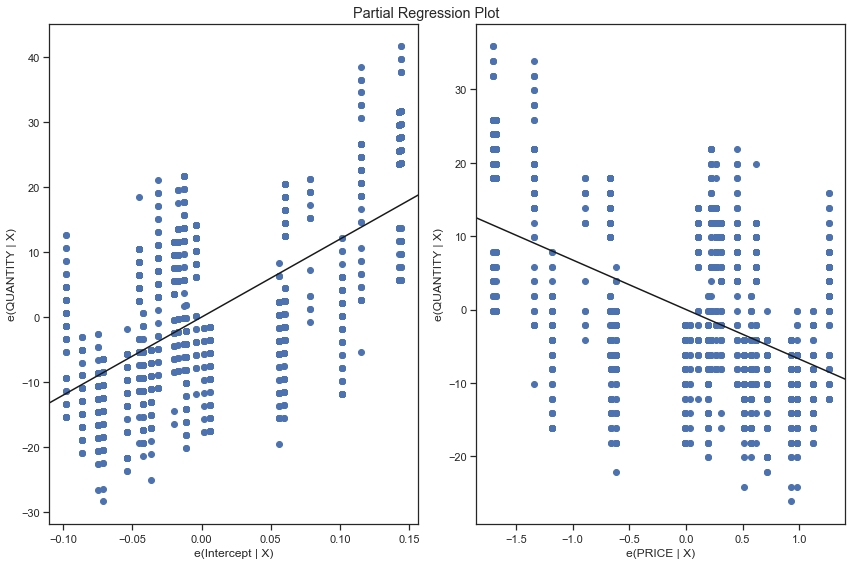

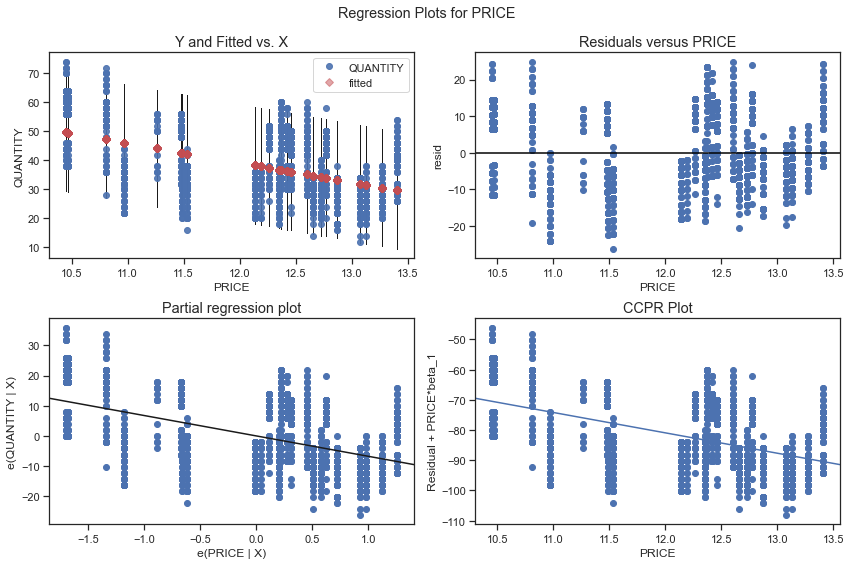

In [66]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit() 
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)

### Coffee

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
6,2053,2,COFFEE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
14,2053,2,COFFEE,1/13/13,13.41,32,2013,No Holiday,1,0,30.2,0
22,2053,2,COFFEE,1/13/14,12.37,60,2014,No Holiday,0,0,28.4,0
30,2053,2,COFFEE,1/13/15,10.81,66,2015,No Holiday,0,0,28.4,0
38,2053,2,COFFEE,1/14/12,12.60,42,2012,No Holiday,1,0,23.0,0


(837, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2053.0,2.0,11.934636,46.802867,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.947643,9.909910,1.063043,0.451373,0.400776,20.005316,0.327324
min,2053.0,2.0,10.450000,20.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2053.0,2.0,10.810000,40.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2053.0,2.0,12.370000,48.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.0,2.0,12.600000,54.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.0,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


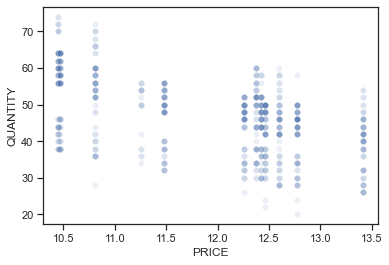

In [67]:
coffee = combined_data[combined_data['ITEM_NAME'] == 'COFFEE'] 
coffee.head()
coffee.shape
coffee.describe()
sns.scatterplot(x = coffee.PRICE, y = coffee.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           6.20e-62
Time:                        17:51:09   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

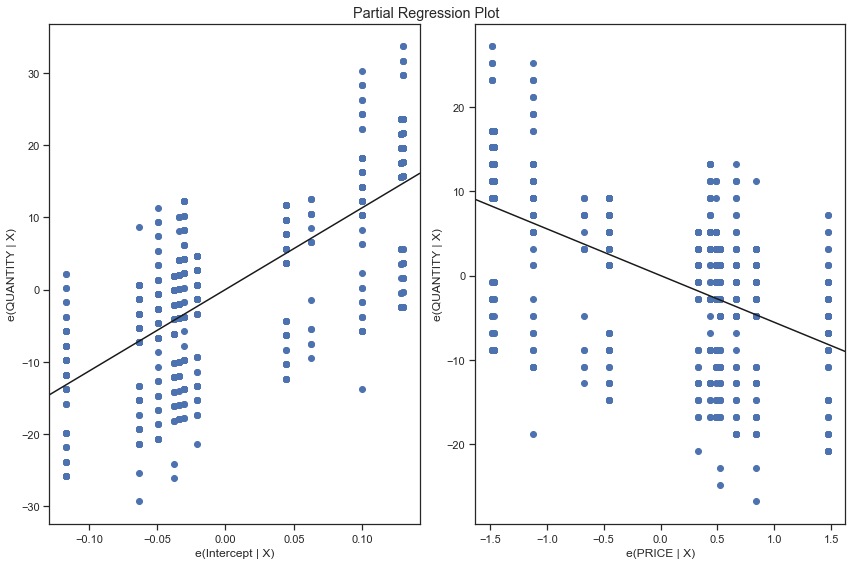

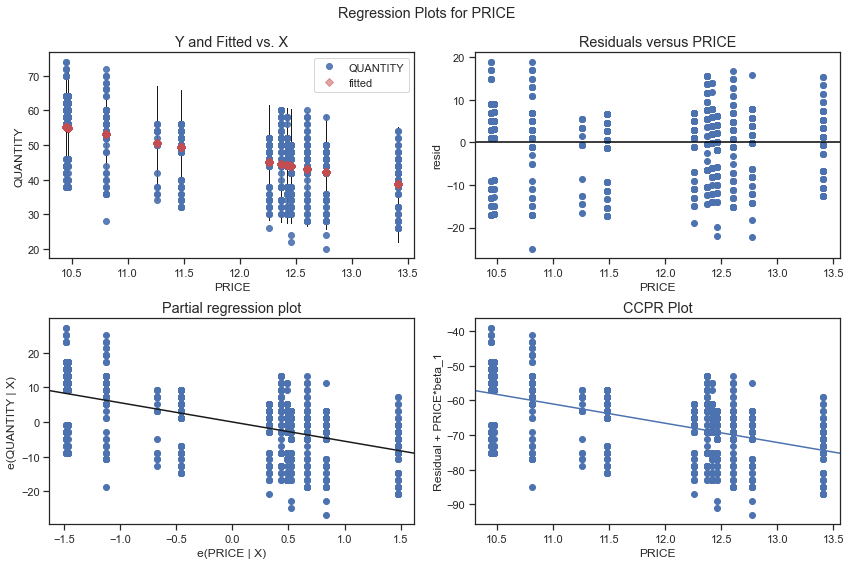

In [68]:
coffee_model = ols("QUANTITY ~ PRICE", data=coffee).fit() 
print(coffee_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coffee_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coffee_model, 'PRICE', fig=fig)

### Lemonade

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
12,2052,2,LEMONADE,1/13/13,12.64,18,2013,No Holiday,1,0,30.2,0
20,2052,2,LEMONADE,1/13/14,11.96,24,2014,No Holiday,0,0,28.4,0
28,2052,2,LEMONADE,1/13/15,11.45,28,2015,No Holiday,0,0,28.4,0
36,2052,2,LEMONADE,1/14/12,12.75,20,2012,No Holiday,1,0,23.0,0


(837, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2052.0,2.0,11.976918,20.910394,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.820698,4.514501,1.063043,0.451373,0.400776,20.005316,0.327324
min,2052.0,2.0,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2052.0,2.0,11.360000,18.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.0,2.0,12.260000,20.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.0,2.0,12.720000,24.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2052.0,2.0,12.850000,34.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


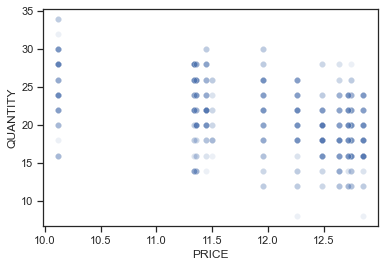

In [69]:
lemonade = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE'] # for lemonade
lemonade.head()
lemonade.shape
lemonade.describe()
sns.scatterplot(data = lemonade, x = lemonade.PRICE, y = lemonade.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           7.46e-46
Time:                        17:51:10   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.0

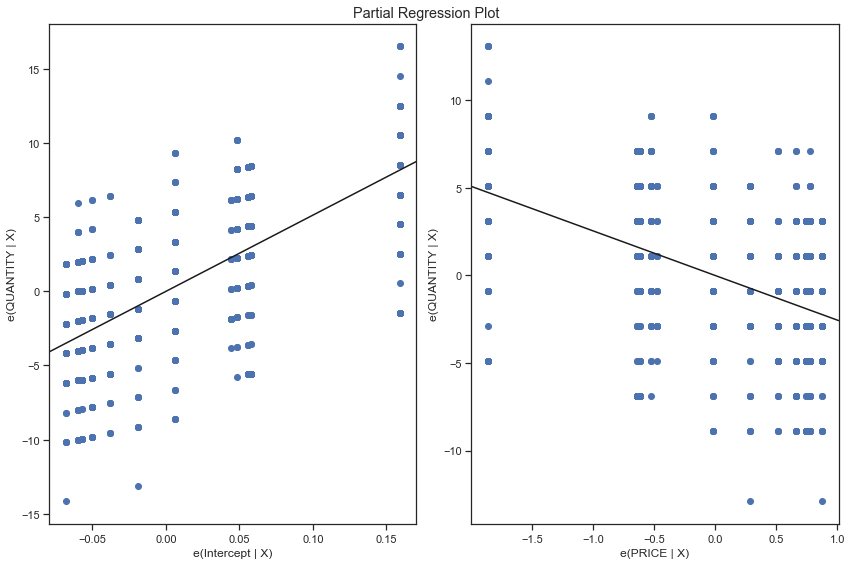

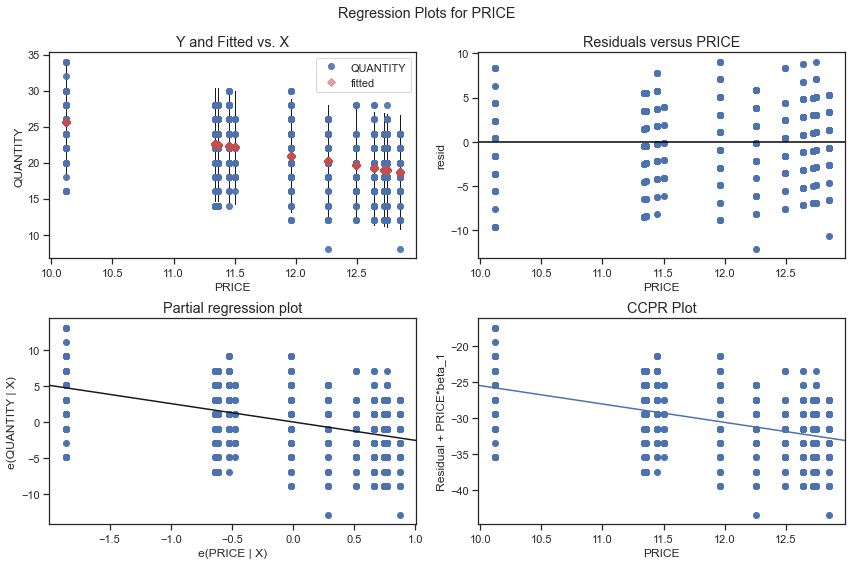

In [70]:
lemonade_model = ols("QUANTITY ~ PRICE", data=lemonade).fit() # build and fit the model
print(lemonade_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lemonade_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lemonade_model, 'PRICE', fig=fig)

# Price elasticity 

In [71]:
price_elasticities = dict()
data_model = dict()

In [72]:
## defining a function to find price elasticity 
def create_model(data):
    model = ols('QUANTITY ~ PRICE', data=data).fit()   
    price_elasticity = model.params[1]  # parameter at index1
    print('The price elasticity of the product: ' +  str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    data_model= [data, model]
    return price_elasticity, data_model
    

In [73]:
np.unique(burger['SELL_ID'])

array([1070, 2051, 2052, 2053])

In [74]:
weekdays_outdoor = weekdays[weekdays['IS_OUTDOOR'] == 1]

In [75]:
burger_1070_data = burger_weekdays_outdoor_1070

The price elasticity of the product: -8.658581488470588
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Thu, 18 Aug 2022   Prob (F-statistic):          5.51e-153
Time:                        17:51:11   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

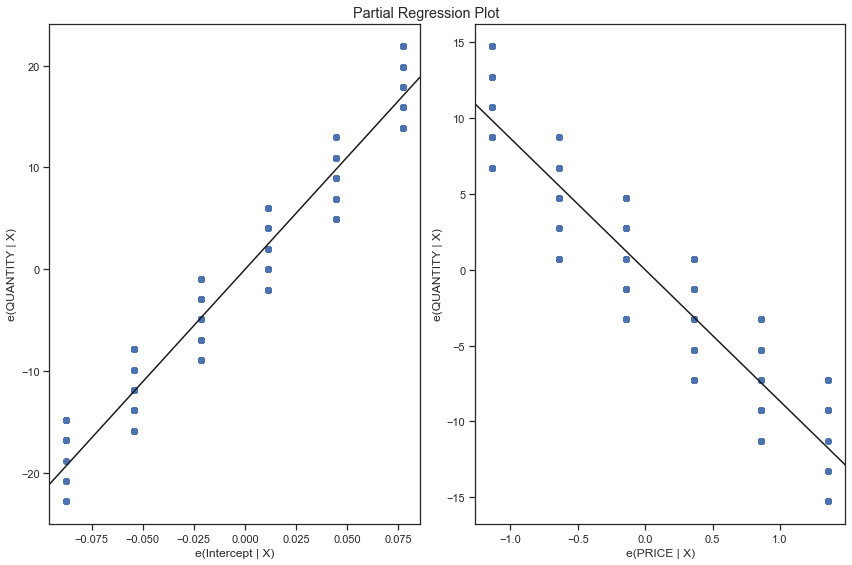

In [76]:
price_elasticities['burger_1070'], data_model['burger_1070'] = create_model(burger_1070_data)


The price elasticity of the product: -3.6189906154563145
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           1.34e-58
Time:                        17:51:11   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

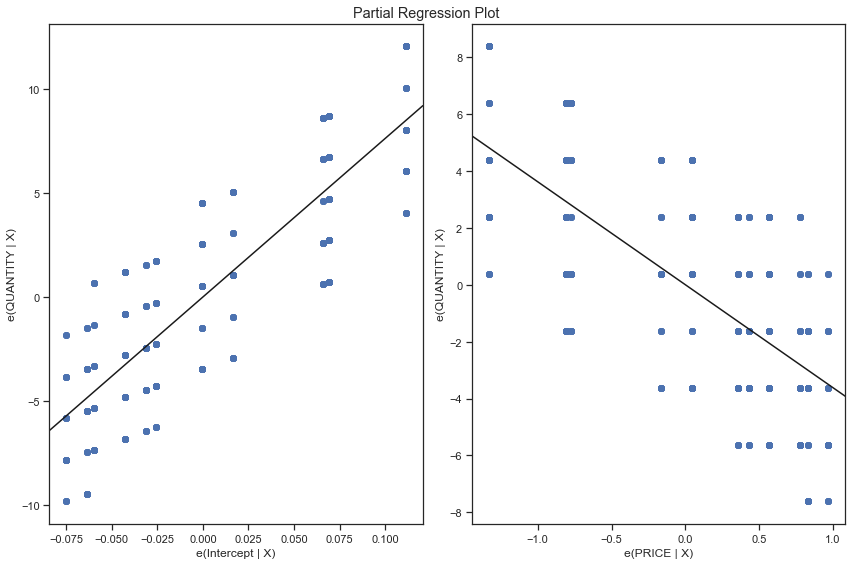

In [77]:
burger_2051_data = weekdays_outdoor[(weekdays_outdoor['ITEM_NAME'] == "BURGER") & (weekdays_outdoor['SELL_ID'] == 2051)]
price_elasticities['burger_2051'], data_model['burger_2051'] = create_model(burger_2051_data)


The price elasticity of the product: -2.856702984559961
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           5.32e-53
Time:                        17:51:11   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

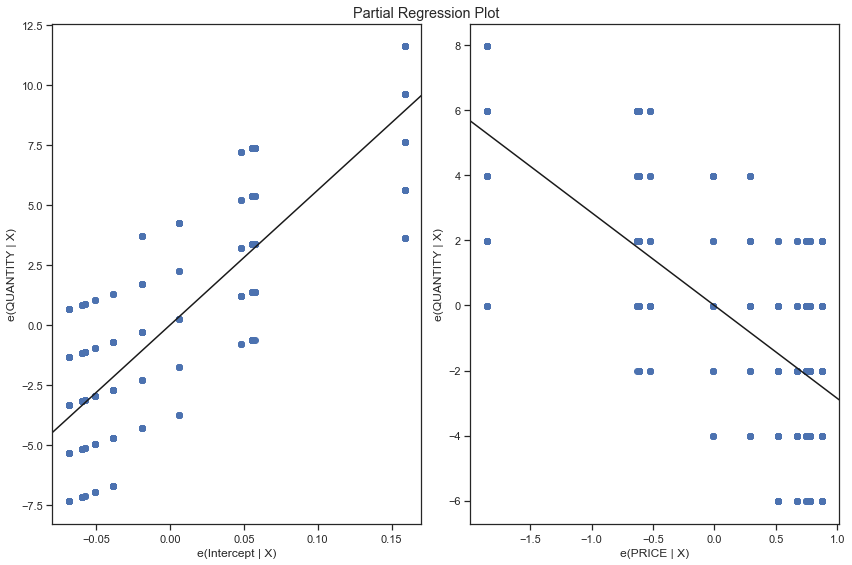

In [78]:
burger_2052_data = weekdays_outdoor[(weekdays_outdoor['ITEM_NAME'] == "BURGER") & (weekdays_outdoor['SELL_ID'] == 2052)]
price_elasticities['burger_2052'], data_model['burger_2052'] = create_model(burger_2052_data)


The price elasticity of the product: -6.164156666230154
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 18 Aug 2022   Prob (F-statistic):          3.72e-152
Time:                        17:51:11   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

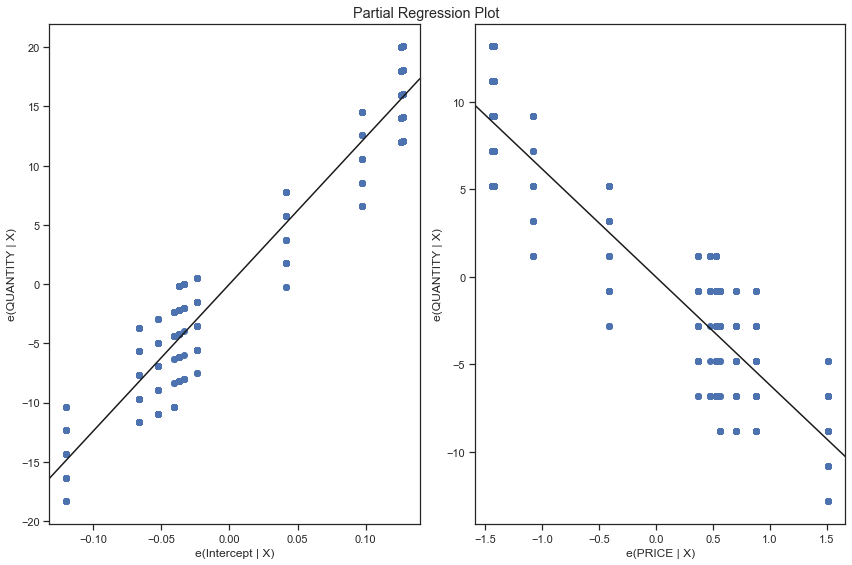

In [79]:
burger_2053_data = weekdays_outdoor[(weekdays_outdoor['ITEM_NAME'] == "BURGER") & (weekdays_outdoor['SELL_ID'] == 2053)]
price_elasticities['burger_2053'], data_model['burger_2053'] = create_model(burger_2053_data)


In [80]:
coke_data = weekdays_outdoor[weekdays_outdoor['ITEM_NAME'] == 'COKE']
coke_data.head()
np.unique(coke_data['SELL_ID'])

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
50,2051,2,COKE,1/14/14,13.27,24,2014,No Holiday,0,0,28.4,1
55,2053,2,COKE,1/14/14,12.37,52,2014,No Holiday,0,0,28.4,1
90,2051,2,COKE,1/15/15,11.53,36,2015,No Holiday,0,0,32.0,1
95,2053,2,COKE,1/15/15,10.81,56,2015,No Holiday,0,0,32.0,1
122,2051,2,COKE,1/16/15,11.53,32,2015,No Holiday,0,0,32.0,1


array([2051, 2053])

The price elasticity of the product: -7.460103485085
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     466.3
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           2.00e-82
Time:                        17:53:38   Log-Likelihood:                -2994.5
No. Observations:                 832   AIC:                             5993.
Df Residuals:                     830   BIC:                             6002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

-7.460103485085

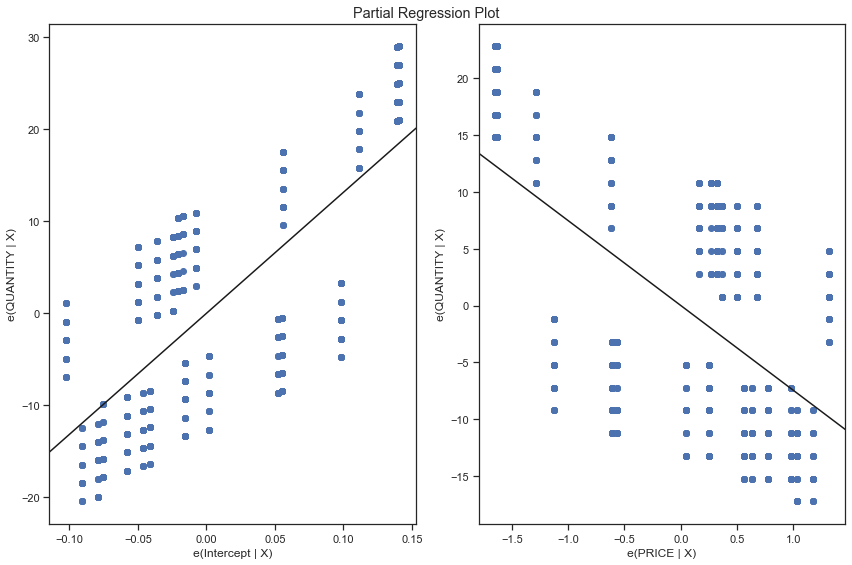

In [115]:
price_elasticities['Coke'], coke_model = create_model(coke_data)
price_elasticities.pop('Coke')

As there is 2 sell id for coke,\
I assume that the bottom group of the scatter plot is the coke that was sold as a single item, \
while the top group was sold as a combo. \
We can look more into this.


The price elasticity of the product: -2.869690191327023
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           4.45e-27
Time:                        17:51:12   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

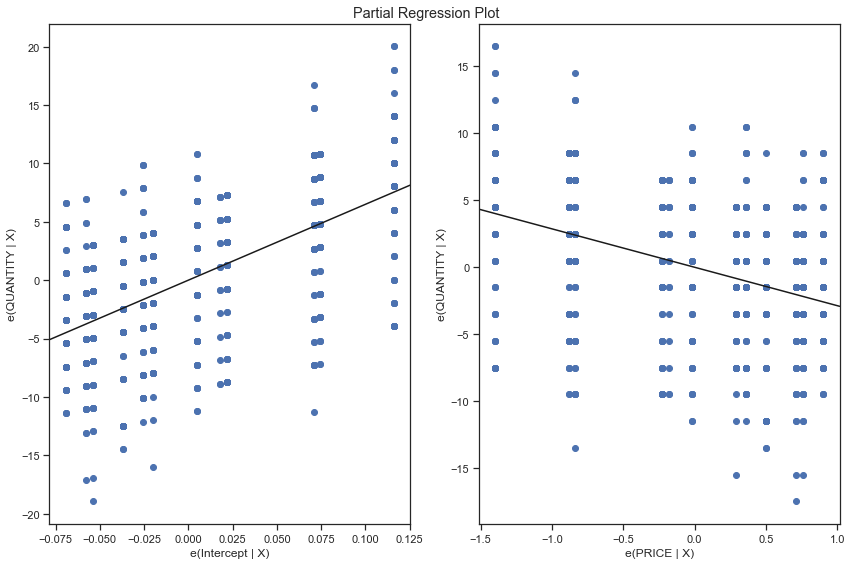

In [82]:
coke_2051_data = coke[coke['SELL_ID'] == 2051]
price_elasticities['coke_2051'] , data_model['coke_2051'] = create_model(coke_2051_data)

The price elasticity of the product: -5.54761024499671
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           6.20e-62
Time:                        17:51:12   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

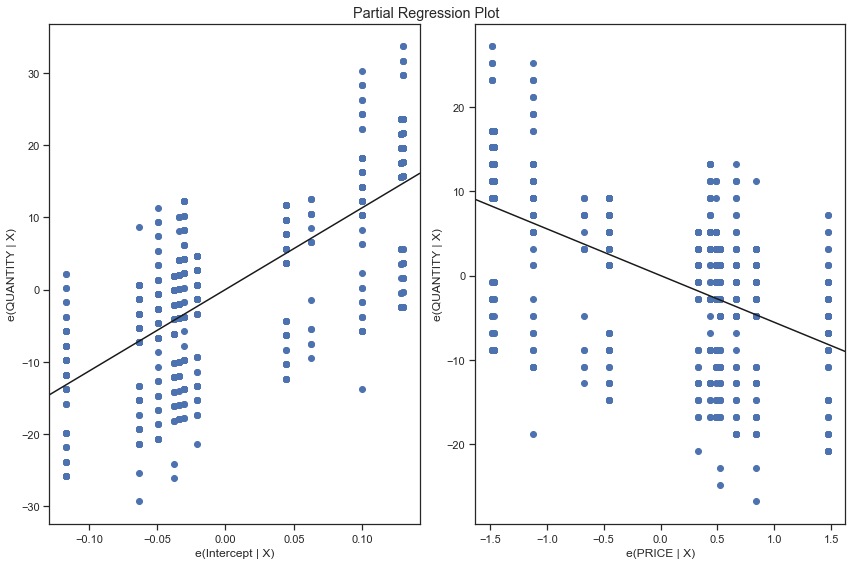

In [83]:
coke_2053_data = coke[coke['SELL_ID'] == 2053]
price_elasticities['coke_2053'] , data_model['coke_2053'] = create_model(coke_2053_data)

In [84]:
coffee_data = weekdays_outdoor[weekdays_outdoor['ITEM_NAME'] == 'COFFEE']
coffee_data.head()
np.unique(coffee_data['SELL_ID'])

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
54,2053,2,COFFEE,1/14/14,12.37,52,2014,No Holiday,0,0,28.4,1
94,2053,2,COFFEE,1/15/15,10.81,56,2015,No Holiday,0,0,32.0,1
126,2053,2,COFFEE,1/16/15,10.81,60,2015,No Holiday,0,0,32.0,1
454,2053,2,COFFEE,1/27/12,12.60,46,2012,No Holiday,0,0,32.0,1
582,2053,2,COFFEE,1/31/12,12.60,42,2012,No Holiday,0,0,32.0,1


array([2053])

Only 1 sell id for coffee.

The price elasticity of the product: -6.164156666230154
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 18 Aug 2022   Prob (F-statistic):          3.72e-152
Time:                        17:51:12   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

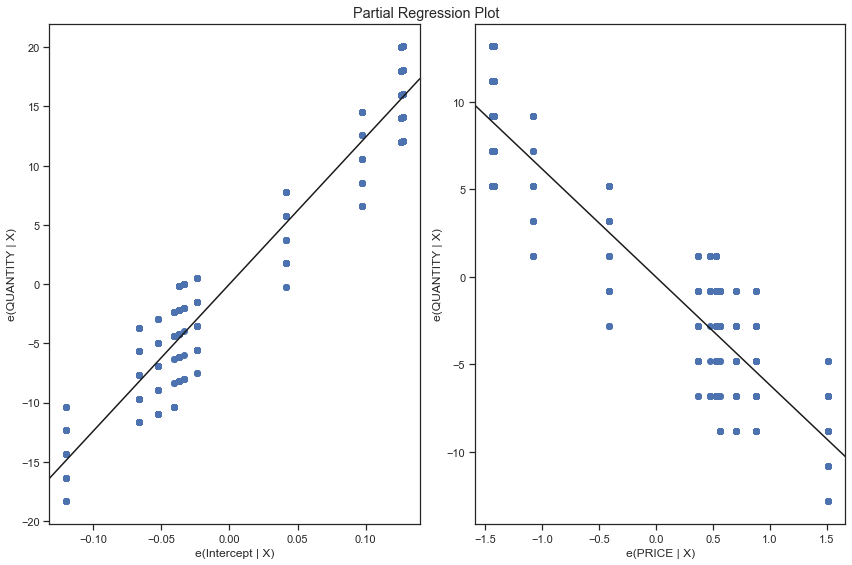

In [85]:
price_elasticities['coffee_2053'] ,data_model['coffee_2053'] = create_model(coffee_data)

In [86]:
lemonade_data = weekdays_outdoor[weekdays_outdoor['ITEM_NAME'] == 'LEMONADE']
lemonade_data.head()
np.unique(lemonade_data['SELL_ID'])

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
52,2052,2,LEMONADE,1/14/14,11.96,26,2014,No Holiday,0,0,28.4,1
92,2052,2,LEMONADE,1/15/15,11.45,28,2015,No Holiday,0,0,32.0,1
124,2052,2,LEMONADE,1/16/15,11.45,22,2015,No Holiday,0,0,32.0,1
452,2052,2,LEMONADE,1/27/12,12.75,18,2012,No Holiday,0,0,32.0,1
580,2052,2,LEMONADE,1/31/12,12.75,16,2012,No Holiday,0,0,32.0,1


array([2052])

Only 1 sell id for lemonade.

The price elasticity of the product: -2.856702984559961
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           5.32e-53
Time:                        17:51:12   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

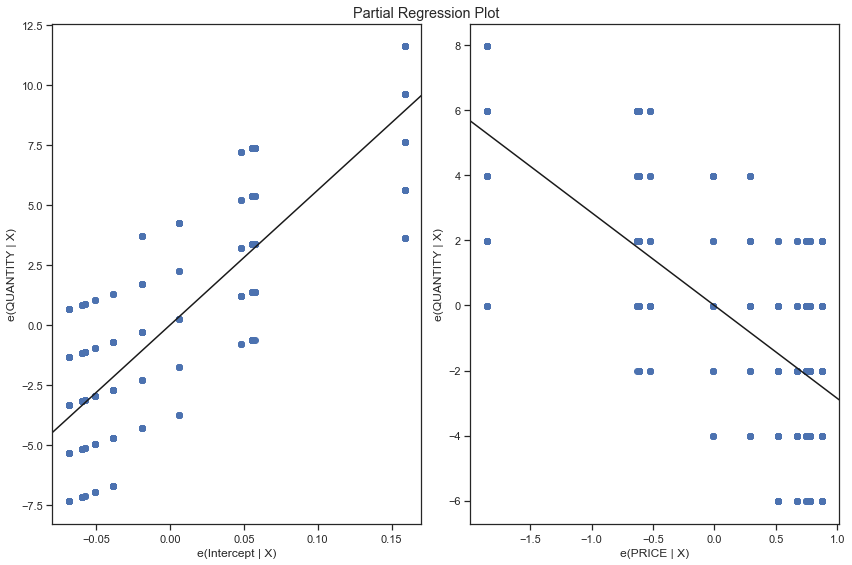

In [87]:
price_elasticities['lemonade_2052'], data_model['lemonade_2052'] = create_model(lemonade_data)

## Price elasticities of all items

In [88]:
price_elasticities

{'burger_1070': -8.658581488470588,
 'burger_2051': -3.6189906154563145,
 'burger_2052': -2.856702984559961,
 'burger_2053': -6.164156666230154,
 'Coke': -7.460103485085,
 'coke_2051': -2.869690191327023,
 'coke_2053': -5.54761024499671,
 'coffee_2053': -6.164156666230154,
 'lemonade_2052': -2.856702984559961}

# Finding the optimal price for maximum profit

We use the coke model as there is only 1 sell id. \
We can create a data frame with a list of price, \
and predict the quantity sold with the model we created from above.

In [89]:
coke_data.PRICE.min()
coke_data.PRICE.max()

10.45

13.41

We can start from a bit lower than the current lowest price.

In [90]:
start_price = 9
end_price = 22

In [91]:
test_coke_df = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
test_coke_df.head()

,PRICE,QUANTITY


In [92]:
test_coke_df['PRICE'] = np.arange(start_price, end_price,0.01)

In [101]:
## Predict with the model we created from above
test_coke_df['QUANTITY'] = data_model['coke_2051'][1].predict(test_coke_df['PRICE'])

Now we can calculate the profit with the following equation.

$$PROFIT = (PRICE - COST) * QUANTITY$$
\
As I don't have the data of the actual cost of coke, \
lets assume the cost of coke to be $9 (which is the lowest price)



In [102]:
cost = 9

In [103]:
test_coke_df['PROFIT'] = (test_coke_df['PRICE'] - cost) * test_coke_df['QUANTITY']

In [104]:
test_coke_df.head()

,PRICE,QUANTITY,PROFIT
0,9.00,39.163372,0.000000
1,9.01,39.134676,0.391347
2,9.02,39.105979,0.782120
3,9.03,39.077282,1.172318
4,9.04,39.048585,1.561943


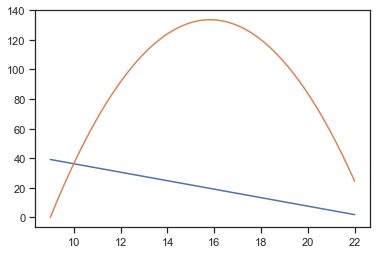

In [105]:
## plotting
plt.plot(test_coke_df['PRICE'],test_coke_df['QUANTITY'])
plt.plot(test_coke_df['PRICE'],test_coke_df['PROFIT'])
plt.show()

The optimal price is around 16.
Lets find the exact value.

In [106]:
## row index of the highest profit
ind = np.where(test_coke_df['PROFIT'] == test_coke_df['PROFIT'].max())[0][0]
ind

682

In [107]:
test_coke_df.loc[[ind]]

,PRICE,QUANTITY,PROFIT
682,15.82,19.592085,133.618022


## Creating a function to find optimal for all items

In [108]:
import math

In [109]:
def find_optimal(data, model):
    df = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    start_price = math.floor(data['PRICE'].min()) - 1
    end_price = math.ceil(data['PRICE'].max()) + 6
    cost = start_price ## assuming the lowest profit is 0
    df['PRICE'] = np.arange(start_price, end_price, 0.01)
    
    ## Predicting
    df['QUANTITY'] = model.predict(df['PRICE'])
    
    ## finding profit
    df['PROFIT'] = (df['PRICE'] - cost) * df['QUANTITY']
    ## plotting
    plt.plot(df['PRICE'],df['QUANTITY'])
    plt.plot(df['PRICE'],df['PROFIT'])
    plt.show()
    
    ## finding optimum
    ind = np.where(df['PROFIT'] == df['PROFIT'].max())[0][0]
    max_profit = df.loc[[ind]] ## printing the row with highest profit
    return max_profit

# Optimal Price

In [116]:
optimal = {}

In [117]:
data_model.keys()


dict_keys(['burger_1070', 'burger_2051', 'burger_2052', 'burger_2053', 'coke_2051', 'coke_2053', 'coffee_2053', 'lemonade_2052'])

In [118]:
## renaming the data 
lemonade_2052_data = lemonade_data
coffee_2053_data = coffee_data

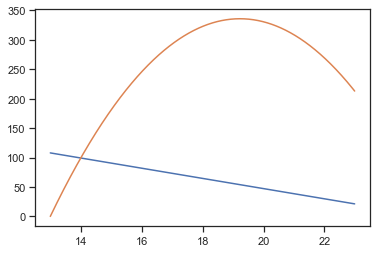

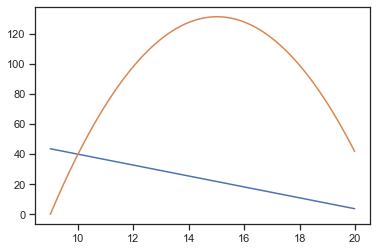

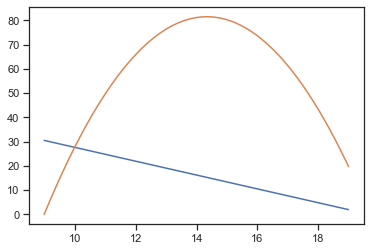

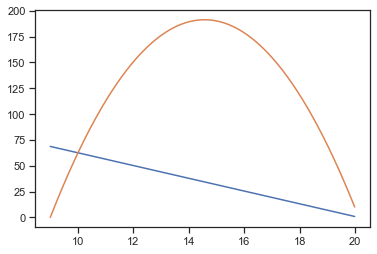

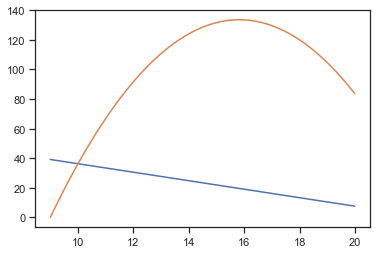

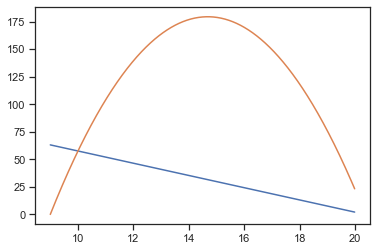

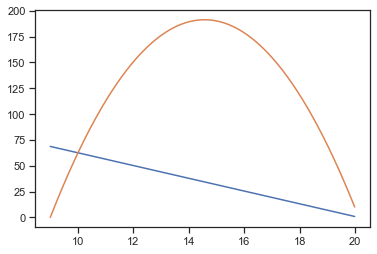

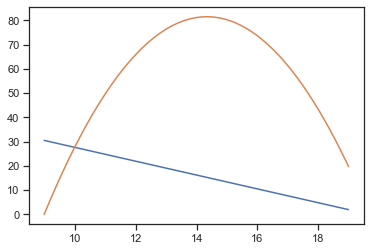

In [119]:
for key in price_elasticities.keys():
    optimal[key] = find_optimal(data_model[key][0], data_model[key][1])

## List of Optimal Price

In [120]:
for key in optimal:
    print(key)
    print(optimal[key])
    print("\n \n")

burger_1070
     PRICE   QUANTITY      PROFIT
622  19.22  53.942031  335.519431

 

burger_2051
     PRICE   QUANTITY      PROFIT
602  15.02  21.782193  131.128799

 

burger_2052
     PRICE   QUANTITY     PROFIT
534  14.34  15.259215  81.484211

 

burger_2053
     PRICE   QUANTITY      PROFIT
557  14.57  34.329951  191.217825

 

coke_2051
     PRICE   QUANTITY      PROFIT
682  15.82  19.592085  133.618022

 

coke_2053
     PRICE  QUANTITY      PROFIT
569  14.69  31.51718  179.332752

 

coffee_2053
     PRICE   QUANTITY      PROFIT
557  14.57  34.329951  191.217825

 

lemonade_2052
     PRICE   QUANTITY     PROFIT
534  14.34  15.259215  81.484211

 

